<a href="https://colab.research.google.com/github/sahilmerai/ml_basic/blob/master/linear_regression/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

heart = pd.read_csv("heart.csv")

In [ ]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


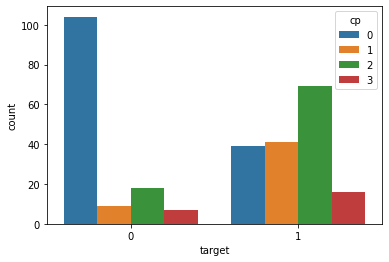

In [ ]:
sns.countplot(x="target", hue="cp", data=heart)

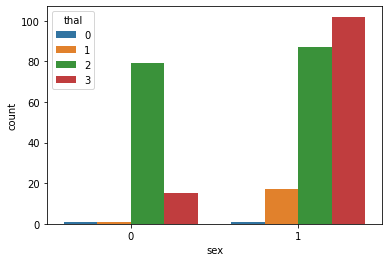

In [ ]:
sns.countplot(x="sex", hue="thal", data = heart)

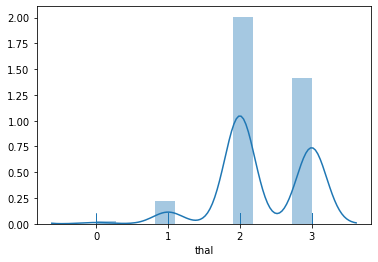

In [ ]:
sns.distplot(heart["thal"],rug=True)

In [ ]:
X = heart.drop("target",axis=1)
y = heart["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)


In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train , y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test , prediction)

'              precision    recall  f1-score   support\n\n           0       0.81      0.73      0.77        41\n           1       0.80      0.86      0.83        50\n\n    accuracy                           0.80        91\n   macro avg       0.80      0.80      0.80        91\nweighted avg       0.80      0.80      0.80        91\n'

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test , prediction)

array([[30, 11],
       [ 7, 43]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test , prediction)

0.8021978021978022

In [ ]:
X = heart[["trestbps"]]

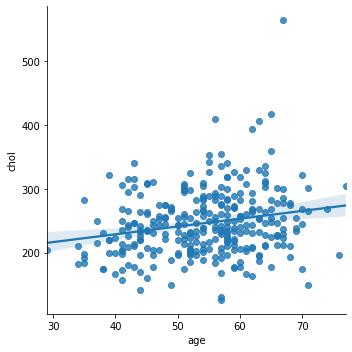

In [ ]:
sns.lmplot(x='age', y='chol' ,data=heart)


0.21001256735867366


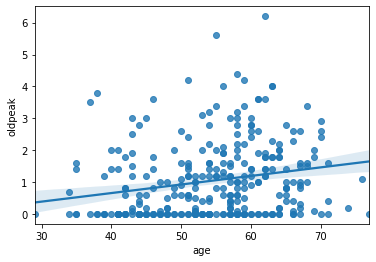

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(heart["age"] , heart["oldpeak"] )
sns.regplot(x="age" , y="oldpeak", data=heart )
print(corr)